In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

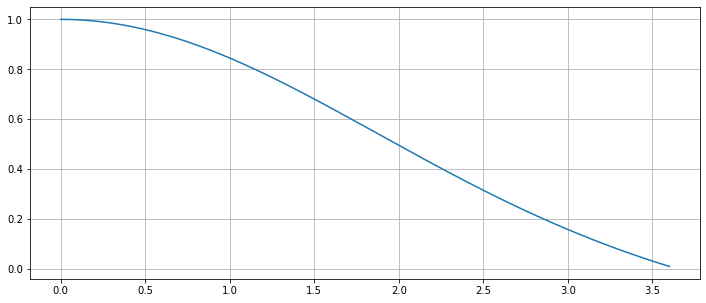

In [29]:
#Parameters
n = 1.5
t_f = 3.6
y0 = np.asarray([1, 0]).astype(float)

def f(t, y):
    f = np.zeros(len(y)) #Initialize to zero vector

    f[0] = y[1]
    if t==0:
        f[1] = 0
    else:
        f[1] = -np.power(y[0], n) - (2/t) * y[1]
    return f

def f_J(t,y):
    f_J = np.zeros((len(y), len(y))) #Initialize to zero matrix

    f_J[0,1] = 1
    f_J[1,0] = - n * np.power(y[0], n-1)
    if t==0:
        f_J[1,1] = 0
    else:
        f_J[1,1] = -(2/t)
    return f_J

#Calling solver
sol = solve_ivp(fun=f, t_span=(0,t_f), y0=y0, method='BDF', jac=f_J, max_step = 1e-3)

#Plotting Solution
plt.figure(figsize=(12,5))
plt.plot(sol.t, sol.y[0,:])
plt.grid(True)
plt.show()

In [16]:
print(len(sol.t))

5009
